✅ Loaded and processed embeddings: 19323 samples in 14.62s

📊 Classification Report:
               precision    recall  f1-score   support

 TB Negative       0.87      1.00      0.93      3364
 TB Positive       0.25      0.00      0.00       501

    accuracy                           0.87      3865
   macro avg       0.56      0.50      0.47      3865
weighted avg       0.79      0.87      0.81      3865

✅ Sensitivity: 0.002
✅ Specificity: 0.999
✅ Precision: 0.250
✅ ROC AUC: 0.506
✅ PRC AUC: 0.130
✅ Confusion Matrix:
 [[3361    3]
 [ 500    1]]


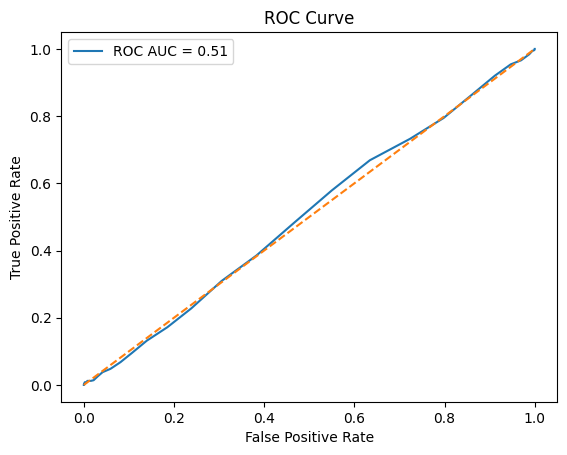

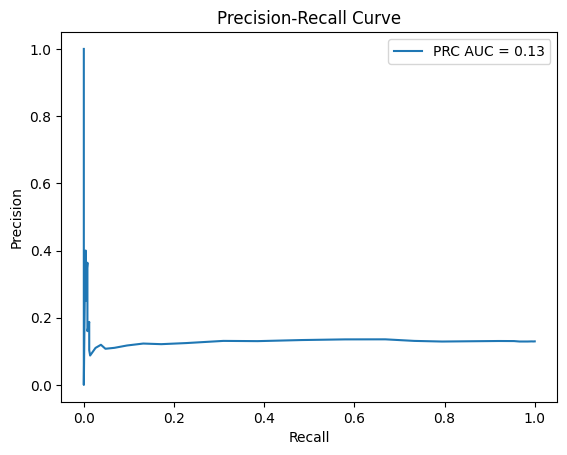


🕒 Timing Report:
• Train/Test Split: 0.10s
• Model Training: 181.67s
• Evaluation: 0.19s
• Plotting: 0.10s
• Total Model Pipeline Time: 182.07s

🚀 Total Execution Time (including data loading): 196.89s


In [4]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve,
    precision_recall_curve, auc, roc_auc_score
)
import matplotlib.pyplot as plt

def load_embeddings_with_labels(embedding_path, metadata_path, max_rows=None):
    t0 = time.time()
    
    embeddings = np.load(embedding_path)
    metadata = pd.read_csv(metadata_path)
    if max_rows:
        metadata = metadata.head(max_rows)

    metadata['full_key'] = metadata['patientID'] + '/' + metadata['filename']
    label_map = {"TB Positive": 1, "TB Negative": 0}

    X, y, keys = [], [], []
    for _, row in metadata.iterrows():
        key = row['full_key']
        if key in embeddings and row['label'] in label_map:
            emb = embeddings[key]
            emb_mean = np.mean(emb, axis=0)
            X.append(emb_mean)
            y.append(label_map[row['label']])
            keys.append(key)

    t1 = time.time()
    print(f"✅ Loaded and processed embeddings: {len(X)} samples in {t1 - t0:.2f}s")
    return np.array(X), np.array(y), keys, t1 - t0

def train_and_evaluate_model(X, y):
    timings = {}
    t_start = time.time()

    t_split = time.time()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    timings["Train/Test Split"] = time.time() - t_split

    t_train = time.time()
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    timings["Model Training"] = time.time() - t_train

    t_eval = time.time()
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    roc_auc = roc_auc_score(y_test, y_prob)
    prc_precision, prc_recall, _ = precision_recall_curve(y_test, y_prob)
    prc_auc = auc(prc_recall, prc_precision)
    timings["Evaluation"] = time.time() - t_eval

    # Reporting
    print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=["TB Negative", "TB Positive"]))
    print(f"✅ Sensitivity: {sensitivity:.3f}")
    print(f"✅ Specificity: {specificity:.3f}")
    print(f"✅ Precision: {precision:.3f}")
    print(f"✅ ROC AUC: {roc_auc:.3f}")
    print(f"✅ PRC AUC: {prc_auc:.3f}")
    print("✅ Confusion Matrix:\n", cm)

    t_plot = time.time()
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(prc_recall, prc_precision, label=f"PRC AUC = {prc_auc:.2f}")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()
    timings["Plotting"] = time.time() - t_plot

    total_time = time.time() - t_start
    print(f"\n🕒 Timing Report:")
    for step, duration in timings.items():
        print(f"• {step}: {duration:.2f}s")
    print(f"• Total Model Pipeline Time: {total_time:.2f}s")

# === USAGE ===
embedding_path = "/Users/abelvillcaroque/git/github/audiumhealth/hear/audium_notebooks/audium_UCSF_embeddings.npz"
metadata_path = "../r2d2_audio_index_with_labels.csv"
max_rows = None  # Change to 100 or another int for faster tests

start_time = time.time()
X, y, keys, load_time = load_embeddings_with_labels(embedding_path, metadata_path, max_rows)
train_and_evaluate_model(X, y)
end_time = time.time()

print(f"\n🚀 Total Execution Time (including data loading): {end_time - start_time:.2f}s")

Confusion Matrix:
 [[1699    1]
 [ 262    1]]

Classification Report:
               precision    recall  f1-score   support

 TB Negative       0.87      1.00      0.93      1700
 TB Positive       0.50      0.00      0.01       263

    accuracy                           0.87      1963
   macro avg       0.68      0.50      0.47      1963
weighted avg       0.82      0.87      0.80      1963

Sensitivity: 0.004
Specificity: 0.999
Precision: 0.500
ROC AUC: 0.457
PRC AUC: 0.122


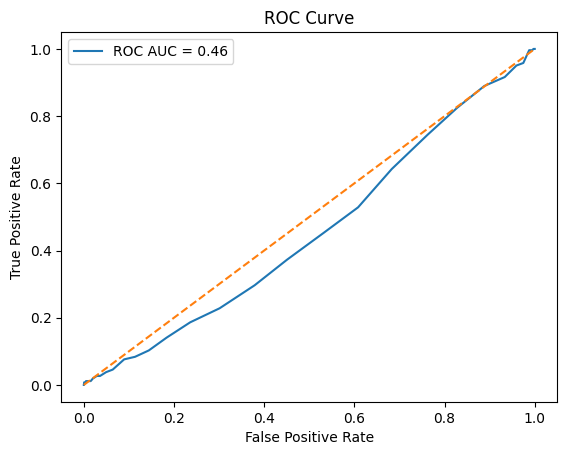

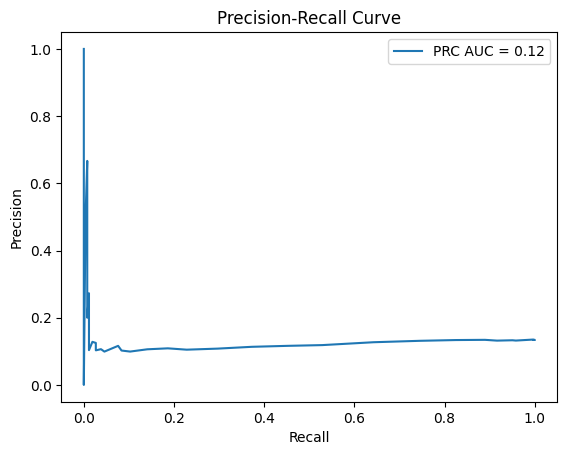

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve,
    precision_recall_curve, auc, roc_auc_score
)
import matplotlib.pyplot as plt

def load_embeddings_with_labels(embedding_path, metadata_path, max_rows=None):
    # Load files
    embeddings = np.load(embedding_path)
    metadata = pd.read_csv(metadata_path)
    if max_rows:
        metadata = metadata.head(max_rows)

    # Normalize filenames for lookup
    metadata['full_key'] = metadata['patientID'] + '/' + metadata['filename']
    label_map = {"TB Positive": 1, "TB Negative": 0}

    X, y, keys = [], [], []
    for _, row in metadata.iterrows():
        key = row['full_key']
        if key in embeddings and row['label'] in label_map:
            emb = embeddings[key]
            emb_mean = np.mean(emb, axis=0)
            X.append(emb_mean)
            y.append(label_map[row['label']])
            keys.append(key)
    
    return np.array(X), np.array(y), keys

def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Metrics
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    roc_auc = roc_auc_score(y_test, y_prob)
    prc_precision, prc_recall, _ = precision_recall_curve(y_test, y_prob)
    prc_auc = auc(prc_recall, prc_precision)

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["TB Negative", "TB Positive"]))
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")
    print(f"PRC AUC: {prc_auc:.3f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    # PRC Curve
    plt.figure()
    plt.plot(prc_recall, prc_precision, label=f"PRC AUC = {prc_auc:.2f}")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

# === USAGE ===
embedding_path = "/Users/abelvillcaroque/git/github/audiumhealth/hear/audium_notebooks/audium_UCSF_embeddings.npz"
metadata_path = "../r2d2_audio_index_with_labels.csv"  # Update path if needed
max_rows = 10000  # Or set to an integer like 200

X, y, keys = load_embeddings_with_labels(embedding_path, metadata_path, max_rows)
train_and_evaluate_model(X, y)